# MODELING

In [44]:
    #import the packages that I will need for the projects
import pandas as pd
import pyreadstat as prs #in order to read SPSS files
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from mpl_toolkits import mplot3d
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [3]:
    #Read the data with the labels in csv format
data = pd.read_csv('W35_May18/ATP W35_modeling_dataset.csv',index_col='Unnamed: 0')

In [4]:
print(data.shape)
data.head()

(4193, 49)


,Computer_Decisions,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,...,religion__4.0,religion__5.0,religion__6.0,religion__6.5,religion__7.0,religion__8.0,religion__9.0,religion__10.0,religion__11.0,religion__12.0
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#seperate dependent variables and other features
target = data['Computer_Decisions']
features = data.drop(['Computer_Decisions'], axis=1)

### TEST TRAIN SPLIT

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [7]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

3354 839 3354 839


In [8]:
#scale data
sc=StandardScaler()
#scale both training and testing set
X_train_scaled= pd.DataFrame(sc.fit_transform(X_train),columns=features.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=features.columns)

In [9]:
X_train_scaled.head()

,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,Use_Snapchat,...,religion__4.0,religion__5.0,religion__6.0,religion__6.5,religion__7.0,religion__8.0,religion__9.0,religion__10.0,religion__11.0,religion__12.0
0,0.207293,-0.50048,0.540483,-0.89986,-1.245442,0.514032,-0.567939,-0.679761,-1.598979,-0.452962,...,-0.086659,-0.185867,-0.095001,-0.059922,-0.091752,-0.083095,-0.260409,-0.280101,-0.179771,2.377974
1,0.207293,-0.50048,0.540483,-0.89986,-1.245442,-1.945403,-0.567939,-0.679761,0.625399,-0.452962,...,-0.086659,5.380189,-0.095001,-0.059922,-0.091752,-0.083095,-0.260409,-0.280101,-0.179771,-0.420526
2,0.207293,-0.50048,0.540483,1.20044,0.873895,0.514032,-0.567939,-0.679761,0.625399,-0.452962,...,-0.086659,-0.185867,-0.095001,-0.059922,-0.091752,-0.083095,-0.260409,-0.280101,-0.179771,-0.420526
3,-1.310742,-0.50048,0.540483,1.20044,-1.245442,0.514032,-0.567939,1.471105,0.625399,2.207692,...,-0.086659,-0.185867,-0.095001,-0.059922,-0.091752,-0.083095,-0.260409,-0.280101,-0.179771,2.377974
4,-1.310742,-0.50048,0.540483,0.15029,0.873895,-1.945403,-0.567939,-0.679761,-1.598979,-0.452962,...,-0.086659,-0.185867,-0.095001,-0.059922,-0.091752,-0.083095,-0.260409,-0.280101,-0.179771,-0.420526


* ### HELPERS

In [10]:
#print out the evaluation metrics for the test predictions stored in test_preds
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [11]:
# Helper function to calculate the evaluation Metric
def performance(y_true, y_predict):
    
    score = f1_score(y_true,y_predict)
    # Return the score
    return score

In [12]:
def plot_feature_importances(model):
    n_features = X_train_scaled.shape[1]
    figsize=(30,12)
    
    feat_imp = pd.DataFrame({'importance': model.feature_importances_})    
    feat_imp['feature'] = X_train_scaled.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:n_features]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    
    feat_imp.plot.barh(align='center',figsize=figsize) 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.title("Representation of features importance in the model")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

In [82]:
def performance_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('** TRAINING PERFORMANCE **')
    print('-> Accuracy Score:', accuracy_score(y_train, model.predict(X_train_scaled)) )
    print('-> Precision Score: {}'.format(precision_score(y_train, model.predict(X_train_scaled))))
    print('-> Recall Score: {}'.format(recall_score(y_train, model.predict(X_train_scaled))))
    print('-> F1 Score: {}'.format(f1_score(y_train, model.predict(X_train_scaled))))
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1] ))
    
    print('\n** TESTING PERFORMANCE')
    print('-> Accuracy Score:', accuracy_score(y_test, model.predict(X_test_scaled)) )
    print('-> Precision Score: {}'.format(precision_score(y_test, model.predict(X_test_scaled))))
    print('-> Recall Score: {}'.format(recall_score(y_test, model.predict(X_test_scaled))))
    print('-> F1 Score: {}'.format(f1_score(y_test, model.predict(X_test_scaled))))
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1],pos_label=1)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

# Test different models with all the variables

### baseline model - Dummy Classifier

Dummy stratified
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.5241502683363148
-> Precision Score: 0.36729857819905215
-> Recall Score: 0.39178515007898895
-> F1 Score: 0.35680751173708924
-> AUC: 0.5008386900546568

** TESTING PERFORMANCE
-> Accuracy Score: 0.5351609058402861
-> Precision Score: 0.39039039039039036
-> Recall Score: 0.34545454545454546
-> F1 Score: 0.3699248120300752
-> AUC: 0.5030362564743704



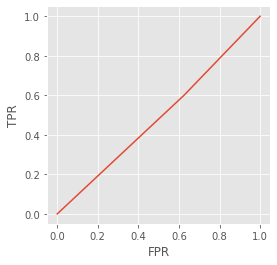

Dummy most_frequent
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6225402504472272
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.6066746126340882
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5



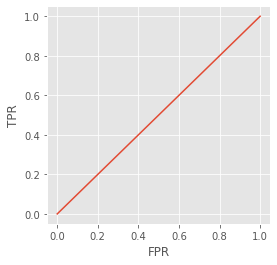

Dummy prior
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6225402504472272
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.6066746126340882
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5



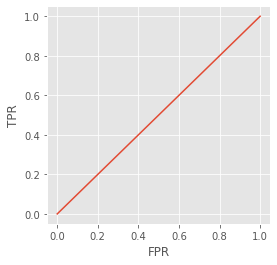

Dummy uniform
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.49433512224209897
-> Precision Score: 0.38443804034582135
-> Recall Score: 0.4976303317535545
-> F1 Score: 0.44897959183673475
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.4934445768772348
-> Precision Score: 0.40274599542334094
-> Recall Score: 0.49393939393939396
-> F1 Score: 0.42513368983957217
-> AUC: 0.5



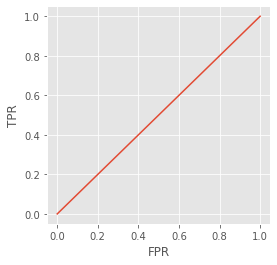

In [83]:
# Baseline (AUC should be 0.5 because we're guessing even though the accuracies are different)
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train_scaled, y_train)
    performance_model(dummy, 'Dummy {}'.format(strategy), plot=True)

In [71]:
dummy = DummyClassifier()

In [72]:
dummy.fit(X_train_scaled, y_train)
print('TRAIN')
train_preds = dummy.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = dummy.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

TRAIN
Precision Score: 0.3768352365415987
Recall Score: 0.36492890995260663
Accuracy Score: 0.5324985092426953
F1 Score: 0.37078651685393255

TEST
Precision Score: 0.3502994011976048
Recall Score: 0.35454545454545455
Accuracy Score: 0.48748510131108463
F1 Score: 0.35240963855421686


### LOGISTIC

In [88]:
# #1 fit a predict a logistic regression and show metrics
print('LOGISTIC\n')
print('-'*30)

logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

LOGISTIC

------------------------------

True Positives: 452
True Negatives: 68
False Positives: 262
False Negatives: 57


,0,1
0,68,262
1,57,452


Logistic
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6422182468694096
-> Precision Score: 0.569327731092437
-> Recall Score: 0.21406003159557663
-> F1 Score: 0.3111366245694604
-> AUC: 0.6276484749989408

** TESTING PERFORMANCE
-> Accuracy Score: 0.6197854588796186
-> Precision Score: 0.544
-> Recall Score: 0.20606060606060606
-> F1 Score: 0.2989010989010989
-> AUC: 0.5895695659939275



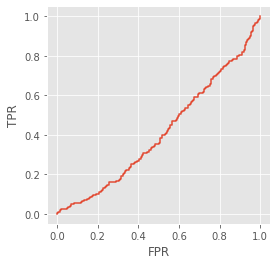

In [85]:
performance_model(logr, 'Logistic', plot=True)

### KNN

In [93]:
# #2 K Nearest Neighbors with all features
print('First K Nearest Neighbors')
print('--'*30)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

First K Nearest Neighbors
------------------------------------------------------------

True Positives: 386
True Negatives: 98
False Positives: 232
False Negatives: 123


,0,1
0,98,232
1,123,386


K-NN
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.7101967799642218
-> Precision Score: 0.6629711751662971
-> Recall Score: 0.47235387045813587
-> F1 Score: 0.551660516605166
-> AUC: 0.758358906381459

** TESTING PERFORMANCE
-> Accuracy Score: 0.5768772348033373
-> Precision Score: 0.4434389140271493
-> Recall Score: 0.296969696969697
-> F1 Score: 0.35571687840290384
-> AUC: 0.5261147824016195



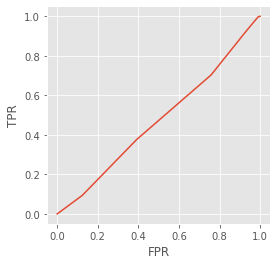

In [90]:
performance_model(knn,'K-NN',plot=True)

In [94]:
#try different  value for k and return the model with the highest f1
def find_best_k(X_train, y_train, X_test, y_test, min_k=5, max_k=32):
    best_k = 0
    best_score = 0.0
    for k in range(min_k,max_k+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    print("Accuracy: {}".format(accuracy_score(y_test, preds)))

In [95]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 6
F1-Score: 0.4580838323353293
Accuracy: 0.6185935637663885


In [97]:
# #2 K Nearest Neighbors after tuning
print('First K Nearest Neighbors')
print('-'*30)
knn_t = KNeighborsClassifier(n_neighbors=6)
knn_t.fit(X_train_scaled, y_train)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

First K Nearest Neighbors
------------------------------

True Positives: 386
True Negatives: 98
False Positives: 232
False Negatives: 123


,0,1
0,98,232
1,123,386


K-NN after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6937984496124031
-> Precision Score: 0.5914307574598316
-> Recall Score: 0.6105845181674565
-> F1 Score: 0.6008550330353672
-> AUC: 0.7407131248751612

** TESTING PERFORMANCE
-> Accuracy Score: 0.5685339690107271
-> Precision Score: 0.4526627218934911
-> Recall Score: 0.4636363636363636
-> F1 Score: 0.4580838323353293
-> AUC: 0.5425046139191523



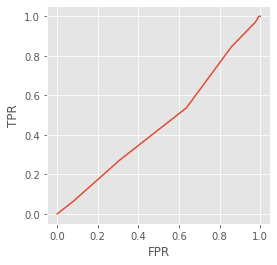

In [98]:
performance_model(knn_t,'K-NN after tuning',plot=True)

### DECISION TREE

In [18]:
#3 Decision Trees (Baseline)
print('DECISION TREE\n')
dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train_scaled, y_train)
print('TRAIN')
train_preds = dtc.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = dtc.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)


performance(y_test,test_preds)

DECISION TREE

TRAIN
Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0

TEST
Precision Score: 0.44837758112094395
Recall Score: 0.46060606060606063
Accuracy Score: 0.564958283671037
F1 Score: 0.4544095665171899

True Positives: 322
True Negatives: 152
False Positives: 178
False Negatives: 187


0.4544095665171899

#### --> Hyperparameter Tuning

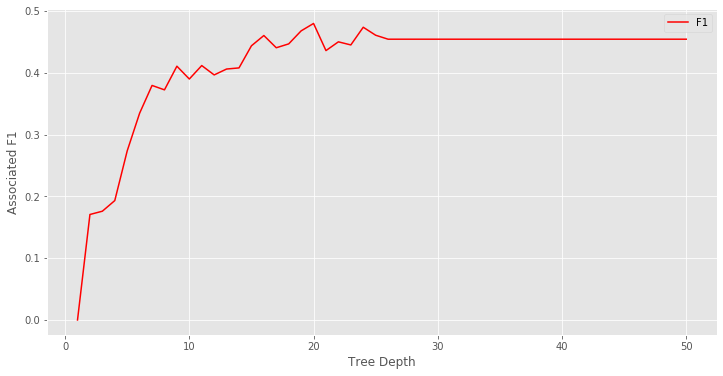

In [19]:
# Find the best tree depth for a depth range: 1-50
plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
f1_results = []

for max_depth in max_depths:
    clsf = DecisionTreeClassifier(max_depth=max_depth, random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(max_depths, f1_results, 'r', label='F1')
plt.xlabel('Tree Depth')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

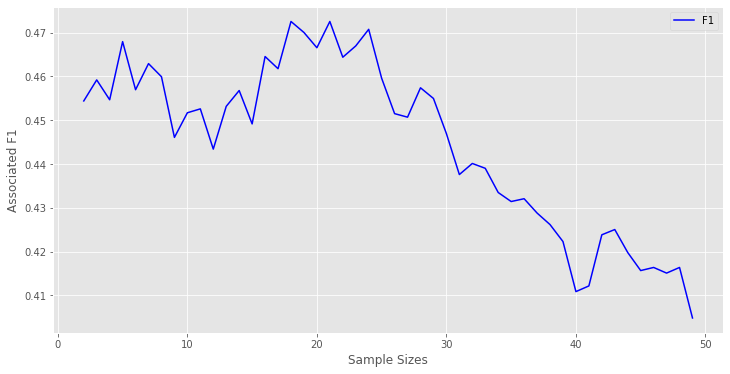

In [20]:
# Find the best min_samples_split
min_samples_splits = np.arange(2,50)
f1_results = []

for min_samples_split in min_samples_splits:
    clsf = DecisionTreeClassifier(min_samples_split=int(min_samples_split), random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, f1_results, 'b', label='F1')
plt.xlabel('Sample Sizes')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

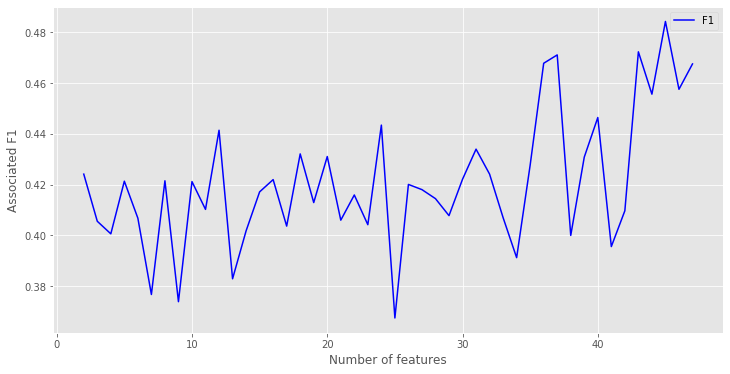

In [21]:
# Find the max_features
max_features = np.arange(2,48)
f1_results = []

for feature in max_features:
    clsf = DecisionTreeClassifier(max_features=int(feature), random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(max_features, f1_results, 'b', label='F1')
plt.xlabel('Number of features')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

In [25]:
print('DECISION TREE\n')
dtc = DecisionTreeClassifier(min_samples_split=23, max_depth=20,max_features=38,random_state=45)
dtc.fit(X_train_scaled, y_train)
print('TRAIN')
train_preds = dtc.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = dtc.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

DECISION TREE

TRAIN
Precision Score: 0.7126895450917797
Recall Score: 0.7053712480252765
Accuracy Score: 0.7814549791293978
F1 Score: 0.7090115125049623

TEST
Precision Score: 0.45569620253164556
Recall Score: 0.43636363636363634
Accuracy Score: 0.5733015494636472
F1 Score: 0.4458204334365325

True Positives: 337
True Negatives: 144
False Positives: 186
False Negatives: 172


### RANDOM FOREST

In [26]:
len(features.columns)

48

In [27]:
#4 Random Forest first model
print('RANDOM FOREST\n')
# rf = RandomForestClassifier(n_estimators=30, max_depth=20)
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
print('TRAIN\n')
train_preds = rf.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = rf.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

print('-------------------------------')

mean_rf_cv_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

RANDOM FOREST

TRAIN

Precision Score: 0.9865612648221344
Recall Score: 0.985781990521327
Accuracy Score: 0.9895646988670245
F1 Score: 0.9861714737257999

TEST
Precision Score: 0.416403785488959
Recall Score: 0.4
Accuracy Score: 0.5435041716328963
F1 Score: 0.40803709428129836

True Positives: 324
True Negatives: 132
False Positives: 198
False Negatives: 185
-------------------------------
Mean Cross Validation Score for Random Forest Classifier: 55.13%


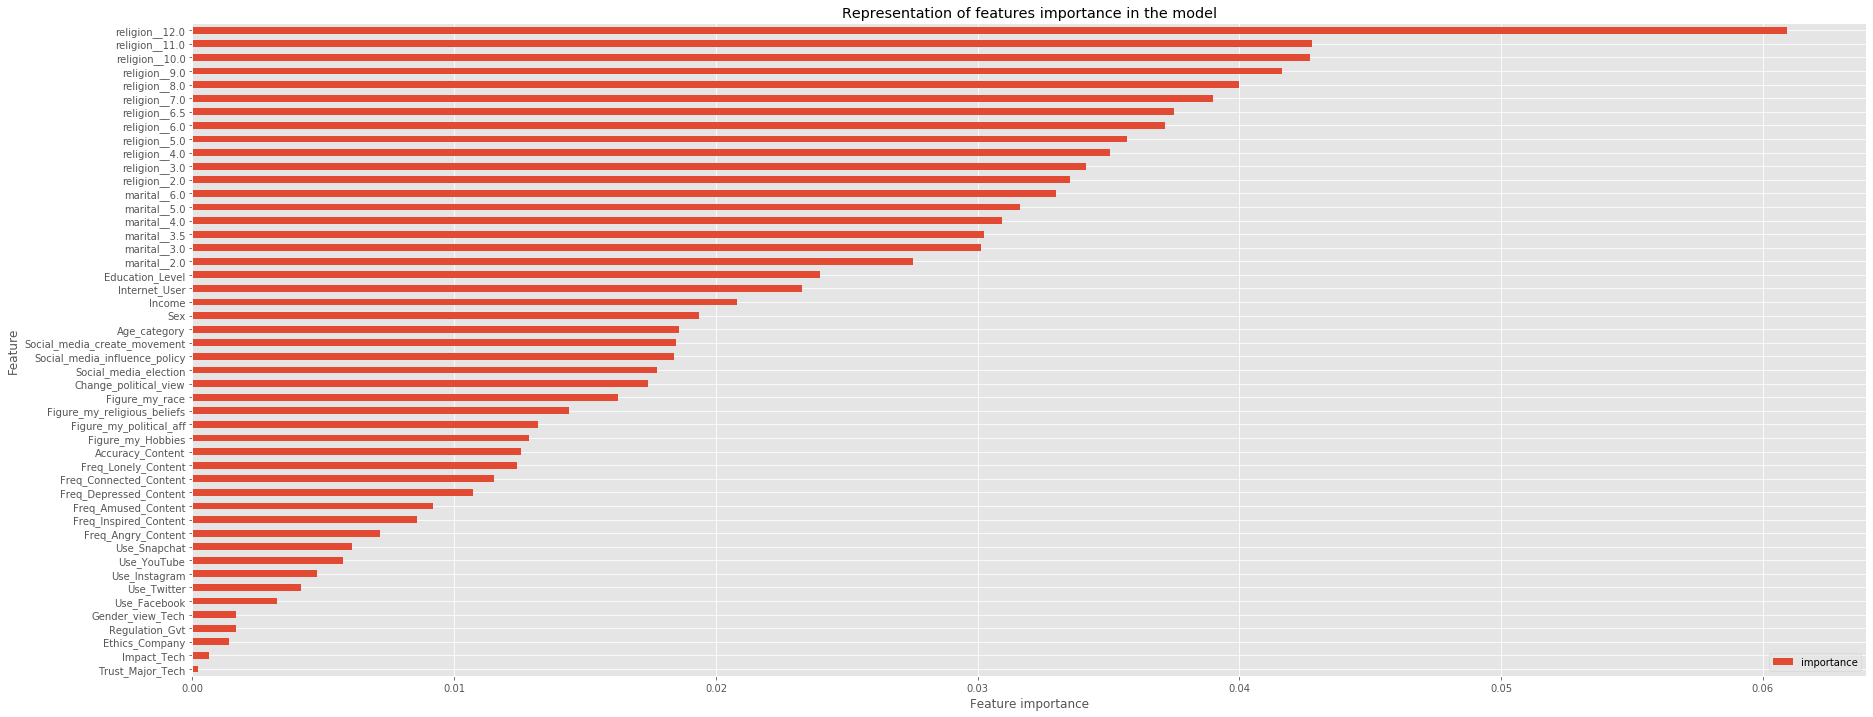

In [28]:
plot_feature_importances(rf)

In [29]:
rf_param_grid = {
    'n_estimators': [10,20,25,30,35,40,45],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10,15,18,20,25,30],
    'min_samples_split': [5,10,15,20,25,30,40],
    'min_samples_leaf': [1, 2, 5,10]
}

In [30]:
import time
start = time.time()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 63.06%
Total Runtime for Grid Search on Random Forest Classifier: 409.0 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 10}


In [36]:
#Let's run the optimal model
print('RANDOM FOREST\n')
rf = RandomForestClassifier(n_estimators=40, max_depth=6,criterion='gini',min_samples_split=15)
rf.fit(X_train_scaled, y_train)
print('TRAIN\n')
train_preds = rf.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = rf.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

print('-------------------------------')

mean_rf_cv_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

RANDOM FOREST

TRAIN

Precision Score: 0.9263157894736842
Recall Score: 0.06951026856240126
Accuracy Score: 0.646690518783542
F1 Score: 0.1293166789125643

TEST
Precision Score: 0.5
Recall Score: 0.030303030303030304
Accuracy Score: 0.6066746126340882
F1 Score: 0.05714285714285715

True Positives: 499
True Negatives: 10
False Positives: 320
False Negatives: 10
-------------------------------
Mean Cross Validation Score for Random Forest Classifier: 62.73%


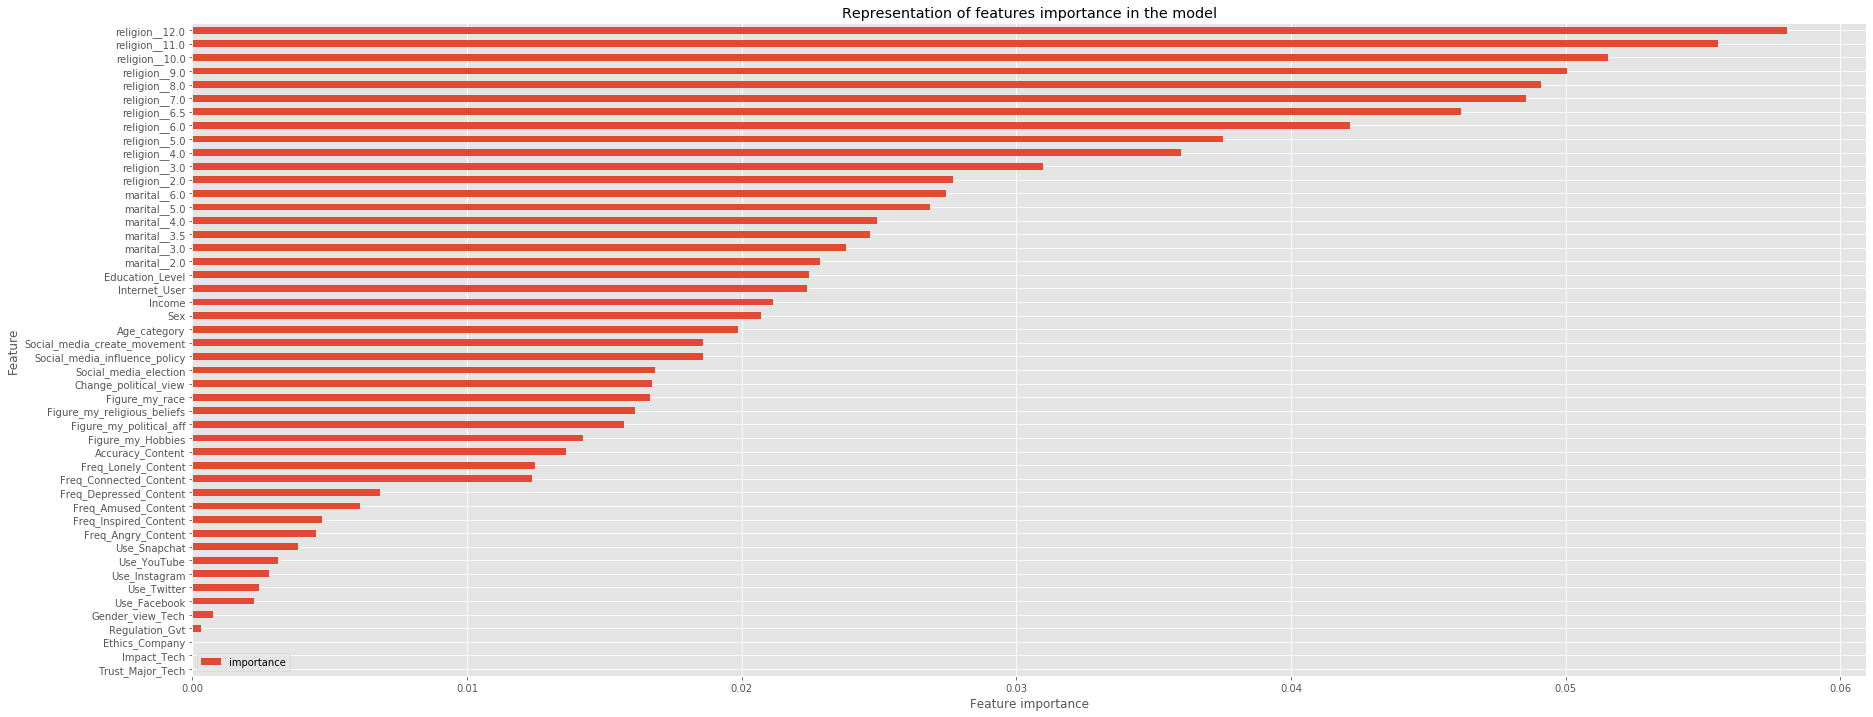

In [35]:
plot_feature_importances(rf)

### ADABOOST

In [37]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 61.27%


In [38]:
adaboost_param_grid = {
    'n_estimators': [10,20,25,30,35,40,45],
    'learning_rate': [1.0, 0.75,0.5, 0.25, 0.1]
}

In [39]:
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_train_scaled, y_train)

print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 62.7%

Optimal Parameters: {'learning_rate': 0.75, 'n_estimators': 10}


In [42]:
#run the model based on the hyperparameter found
adaboost_clf = AdaBoostClassifier(learning_rate=0.75,n_estimators=30)
adaboost_clf.fit(X_train_scaled, y_train)
print('TRAIN\n')
train_preds = adaboost_clf.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = adaboost_clf.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

TRAIN

Precision Score: 0.5875706214689266
Recall Score: 0.16429699842022116
Accuracy Score: 0.6410256410256411
F1 Score: 0.2567901234567901

TEST
Precision Score: 0.5894736842105263
Recall Score: 0.1696969696969697
Accuracy Score: 0.6269368295589988
F1 Score: 0.2635294117647059

True Positives: 470
True Negatives: 56
False Positives: 274
False Negatives: 39


,0,1
0,56,274
1,39,470


### XGBOOST

In [165]:
#baseline
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test_scaled)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 61.6%
Validation accuracy: 63.89%


In [166]:
#Tuning
param_grid = {
    "learning_rate": [1.0,0.5, 0.1],
    'max_depth': [5,15,20],
    'min_child_weight': [10,15],
    'subsample': [ 0.7],
    'n_estimators': [15, 25, 30, 45],
}

In [168]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_scaled, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_scaled)
val_preds = grid_clf.predict(X_test_scaled)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 10
n_estimators: 25
subsample: 0.7

Training Accuracy: 68.1%
Validation accuracy: 65.08%


In [169]:
#Let's run with the optimal parameter
xgb_clf = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,min_child_weight=10,n_estimators=25,subsample=0.7)
xgb_clf.fit(X_train_scaled, y_train)

print('TRAIN\n')
train_preds = xgb_clf.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = xgb_clf.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

TRAIN

Precision Score: 0.7422222222222222
Recall Score: 0.2593167701863354
Accuracy Score: 0.6809779367918902
F1 Score: 0.3843498273878021

TEST
Precision Score: 0.5789473684210527
Recall Score: 0.17857142857142858
Accuracy Score: 0.6507747318235996
F1 Score: 0.2729528535980149

True Positives: 491
True Negatives: 55
False Positives: 253
False Negatives: 40


,0,1
0,55,253
1,40,491


### KERNEL TRICK